# Digit classification

The University of California Irvines' [Optical Recognition of Handwritten Digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) dataset provides the perfect opportunity to practice multiclass classification. It contains almost 1,800 scanned and normalized handwritten digits, each an 8x8 array of numbers from 0 to 16. Let's use logistic regression to make predictions from the data.

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


Here's what the first digit looks like in numerical form.

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

And here's how it looks to the eye.

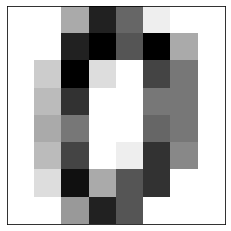

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

It's obviously a 0, but we can confirm that from its label.

In [4]:
digits.target[0]

0

Plot the first 50 images and show the corresponding labels.

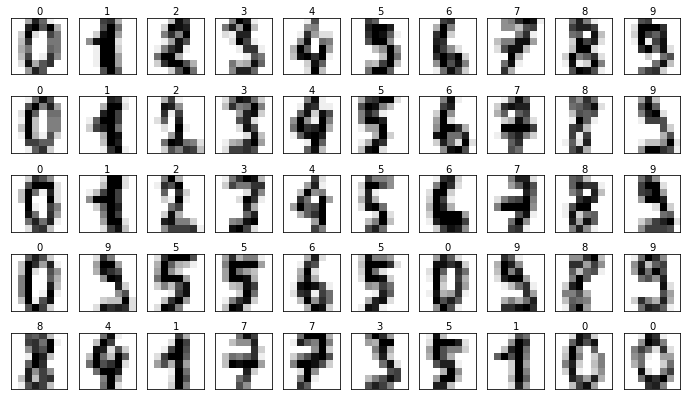

In [5]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

Classification models work best with balanced datasets. Plot the distribution of the samples.

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

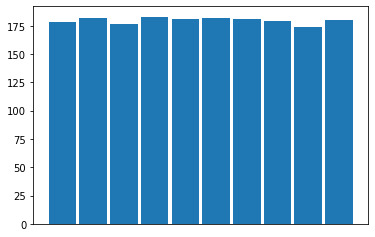

In [6]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

The datatset is pretty well balanced, so let's split the data and train a logistic-regression model.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Jeff\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jeff\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Use the `score` method to quantify the model's accuracy.

In [8]:
model.score(x_test, y_test)

0.95

Print a classification report.

In [9]:
from sklearn.metrics import classification_report

y_predicted = model.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.89      0.89        35
           2       0.97      0.94      0.96        36
           3       0.91      1.00      0.95        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.95      0.97        39
           8       0.88      0.90      0.89        39
           9       0.95      0.90      0.92        41

   micro avg       0.95      0.95      0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



Use a confusion matrix to see how the model performs on the test dataset.

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)